In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import math
from scipy.special import factorial

In [2]:
ctx = straxbra.XebraContext()
run = '00187'
peaks_data_xebra = ctx.get_array(run, 'peaks')
waveform = peaks_data_xebra['data']
width_decile = -peaks_data_xebra['area_decile_from_midpoint'][:,1]
integral = peaks_data_xebra['area']
width = peaks_data_xebra['width'][:,5]
area_per_channel = peaks_data_xebra['area_per_channel']
timestamp = peaks_data_xebra['time']

In [3]:
full_window = [0,200]
first_peak_range = [0,20]
second_peak_range = [20,100]
local_range = [0,20]
right_limit = 8

In [4]:
def CutCondition(area_per_channel, integral, width_decile, width, i):


    if integral[i] > 40 and integral[i] < 500 and width_decile[i] > 10 and width_decile[i] < 80:
        return(True)
    else:
        return(False)

In [5]:
def Cut9keV(area_per_channel, integral, width_decile, width, i):

    if integral[i] > 40 and integral[i] < 100 and width_decile[i] > 10 and width_decile[i] < 30:
        return(True)
    else:
        return(False)

In [6]:
def Cut32keV(area_per_channel, integral, width_decile, width, i):

    if integral[i] > 100 and integral[i] < 350 and width_decile[i] > 19 and width_decile[i] < 26:
        return(True)
    else:
        return(False)

In [7]:
def Cut41keV(integral, i, int_limit1, int_limit2,ratio, amplitude_ratio):
    if int_limit1 > 80 and int_limit1 < 2000 \
    and int_limit2 > 50 and int_limit2 < 150 \
    :
        return(True)
    else:
        return(False)

In [8]:
def PrintWaveform(waveform,i):
    
    fig, ax1 = plt.subplots(sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    plt.show()

In [9]:
def Params(waveform, i,full_window, first_peak_range, second_peak_range):
    
    window_max = waveform[i][full_window[0]: full_window[1]]
    total_maximum = max(window_max)
    selfmade_baseline = np.mean(waveform[i][195:])
    window1 = waveform[i][first_peak_range[0]: first_peak_range[1]]
    maximum1 = max(window1)
    window1 = list(window1)
    maximum1_index = window1.index(maximum1)
    left_lim = len(window1[0 : maximum1_index])
    int_limit1 = sum([selfmade_baseline + a for a in window1[maximum1_index-left_lim:maximum1_index +right_limit] ])
    window2 = waveform[i][second_peak_range[0]: second_peak_range[1]]
    maximum2 = max(window2)
    window2 = list(window2)
    maximum2_index = window2.index(maximum2)+len(window1)
    int_limit2 = sum([selfmade_baseline + b for b in window2[maximum2_index-len(window1)-left_lim:maximum2_index-len(window1) +right_limit] ])
    ratio = int_limit1/int_limit2
    time = (maximum2_index - maximum1_index)*10
    amplitude_ratio = maximum1/maximum2
    
    
    window_max = list(window_max)
    maximum1_index_global = window_max.index(maximum1)
    maximum2_index_global = window_max.index(maximum2)
    return (window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim
           ,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio, maximum1_index_global, maximum2_index_global)

In [10]:
def Process(waveform, i):
    
    window_max, total_maximum, selfmade_baseline, window1, maximum1, maximum1_index, left_lim,int_limit1, window2, maximum2, maximum2_index, int_limit2, ratio, time, amplitude_ratio,maximum1_index_global, maximum2_index_global   = Params(waveform, i,full_window, first_peak_range, second_peak_range)
    Kr41keVFlag = Cut41keV(integral, i, int_limit1, int_limit2,ratio, amplitude_ratio)
    SelectionCutFlag = CutCondition(area_per_channel, integral, width_decile, width, i)
    Kr9keVFlag = Cut9keV(area_per_channel, integral, width_decile, width, i)
    Kr32keVFlag = Cut32keV(area_per_channel, integral, width_decile, width, i)
    PrintingFlag = True
    PMT0_area.append(area_per_channel[i][0])
    

    
    if Kr9keVFlag:
        Kr_9keV_int.append(integral[i])
        Kr_9keV_width_decile.append(width_decile[i])
        if integral[i+1] > 500 and width[i+1] >100 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            Kr_S2_area_9keV.append(integral[i+1])
            Kr_S2_risetime_9keV.append(width_decile[i+1])
            Kr_S2_width_9keV.append(width[i+1])
            
        elif integral[i+2] > 500 and width[i+2] >100 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000:
            Kr_S2_area_9keV.append(integral[i+2])
            Kr_S2_risetime_9keV.append(width_decile[i+2])
            Kr_S2_width_9keV.append(width[i+2]) 
            
        elif integral[i+3] > 500 and width[i+3] >100 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            Kr_S2_area_9keV.append(integral[i+3])
            Kr_S2_risetime_9keV.append(width_decile[i+3])
            Kr_S2_width_9keV.append(width[i+3])
            
        elif integral[i+4] > 500 and width[i+4] >100 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            Kr_S2_area_9keV.append(integral[i+4])
            Kr_S2_risetime_9keV.append(width_decile[i+4])
            Kr_S2_width_9keV.append(width[i+4])
            
        elif integral[i+5] > 500 and width[i+5] >100 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            Kr_S2_area_9keV.append(integral[i+5])
            Kr_S2_risetime_9keV.append(width_decile[i+5])
            Kr_S2_width_9keV.append(width[i+5])
            
        elif integral[i+6] > 500 and width[i+6] >100 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            Kr_S2_area_9keV.append(integral[i+6])
            Kr_S2_risetime_9keV.append(width_decile[i+6])
            Kr_S2_width_9keV.append(width[i+6])


        
    if Kr32keVFlag:
        Kr_32keV_int.append(integral[i])
        Kr_32keV_width_decile.append(width_decile[i])
        if integral[i+1] > 500 and width[i+1] >100 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            Kr_S2_area_32keV.append(integral[i+1])
            Kr_S2_risetime_32keV.append(width_decile[i+1])
            Kr_S2_width_32keV.append(width[i+1])
            
        elif integral[i+2] > 500 and width[i+2] >100 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000:
            Kr_S2_area_32keV.append(integral[i+2]) 
            Kr_S2_risetime_32keV.append(width_decile[i+2])
            Kr_S2_width_32keV.append(width[i+2])
            
        elif integral[i+3] > 500 and width[i+3] >100 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            Kr_S2_area_32keV.append(integral[i+3])
            Kr_S2_risetime_32keV.append(width_decile[i+3])
            Kr_S2_width_32keV.append(width[i+3])
            
        elif integral[i+4] > 500 and width[i+4] >100 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            Kr_S2_area_32keV.append(integral[i+4])
            Kr_S2_risetime_32keV.append(width_decile[i+4])
            Kr_S2_width_32keV.append(width[i+4])
            
        elif integral[i+5] > 500 and width[i+5] >100 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            Kr_S2_area_32keV.append(integral[i+5])
            Kr_S2_risetime_32keV.append(width_decile[i+5])
            Kr_S2_width_32keV.append(width[i+5])
            
        elif integral[i+6] > 500 and width[i+6] >100 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            Kr_S2_area_32keV.append(integral[i+6])
            Kr_S2_risetime_32keV.append(width_decile[i+6])
            Kr_S2_width_32keV.append(width[i+6])
        
#     if PrintingFlag and SelectionCutFlag and KryptonFlag:
#         IndicesKr41keV.append(i)
#         krypton_blob_int.append(integral[i])
#         krypton_blob_width.append(width_decile[i])
        
    if Kr41keVFlag:
        Kr_41keV_int.append(integral[i])
        Kr_41keV_width_decile.append(width_decile[i])
        if integral[i+1] > 500 and width[i+1] >100 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            Kr_S2_area_41keV.append(integral[i+1])
            Kr_S2_risetime_41keV.append(width_decile[i+1])
            Kr_S2_width_41keV.append(width[i+1])
            
        elif integral[i+2] > 500 and width[i+2] >100 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000:
            Kr_S2_area_41keV.append(integral[i+2])
            Kr_S2_risetime_41keV.append(width_decile[i+2])
            Kr_S2_width_41keV.append(width[i+2])
            
        elif integral[i+3] > 500 and width[i+3] >100 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            Kr_S2_area_41keV.append(integral[i+3])
            Kr_S2_risetime_41keV.append(width_decile[i+3])
            Kr_S2_width_41keV.append(width[i+3])
            
        elif integral[i+4] > 500 and width[i+4] >100 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            Kr_S2_area_41keV.append(integral[i+4])
            Kr_S2_risetime_41keV.append(width_decile[i+4])
            Kr_S2_width_41keV.append(width[i+4])
            
        elif integral[i+5] > 500 and width[i+5] >100 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            Kr_S2_area_41keV.append(integral[i+5])
            Kr_S2_risetime_41keV.append(width_decile[i+5])
            Kr_S2_width_41keV.append(width[i+5])
            
        elif integral[i+6] > 500 and width[i+6] >100 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            Kr_S2_area_41keV.append(integral[i+6])
            Kr_S2_risetime_41keV.append(width_decile[i+6])
            Kr_S2_width_41keV.append(width[i+6])
            
#     if PrintingFlag and SelectionCutFlag:
# #         PrintWaveform(waveform,i)
#         IndicesKr.append(i)
#         cut_area_per_channel.append(area_per_channel[i][0])
#         cut_width_decile.append(width_decile[i])
#         cut_integral.append(integral[i])
#         cut_width.append(width[i])
    
#     if SelectionCutFlag and not KryptonFlag:
#         Kr_41kev_int_excluded.append(integral[i])
#         Kr_41kev_width_excluded.append(width_decile[i])

    return()

In [11]:
Kr_9keV_int = []
Kr_9keV_width_decile = []
Kr_32keV_int = []
Kr_32keV_width_decile = []
Kr_41keV_int = []
Kr_41keV_width_decile = []

Kr_S2_risetime_9keV = []
Kr_S2_area_9keV = []
Kr_S2_width_9keV = []
Kr_S2_risetime_32keV = []
Kr_S2_area_32keV = []
Kr_S2_width_32keV = []
Kr_S2_risetime_41keV = []
Kr_S2_area_41keV = []
Kr_S2_width_41keV = []
# Kr_41kev_int_excluded = []
# Kr_41kev_width_excluded = []
# IndicesKr = []
# IndicesKr41keV=[]
PMT0_area = []
# cut_area_per_channel = []
# cut_width = []
# cut_integral= []
# cut_width_decile = []
# krypton_blob_int = []
# krypton_blob_width = []

for i in range(0,len(waveform)):
    
    Process(waveform,i)
    



/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in float_scalars
/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in float_scalars


light yield 9keV:  6.62 +/-  0.06 with a sigma of:  17.50 +/-  0.68
light yield 32keV:  5.74 +/-  0.04 with a sigma of:  52.91 +/-  1.51
light yield 41keV:  5.97 +/-  0.03 with a sigma of:  45.76 +/-  0.95


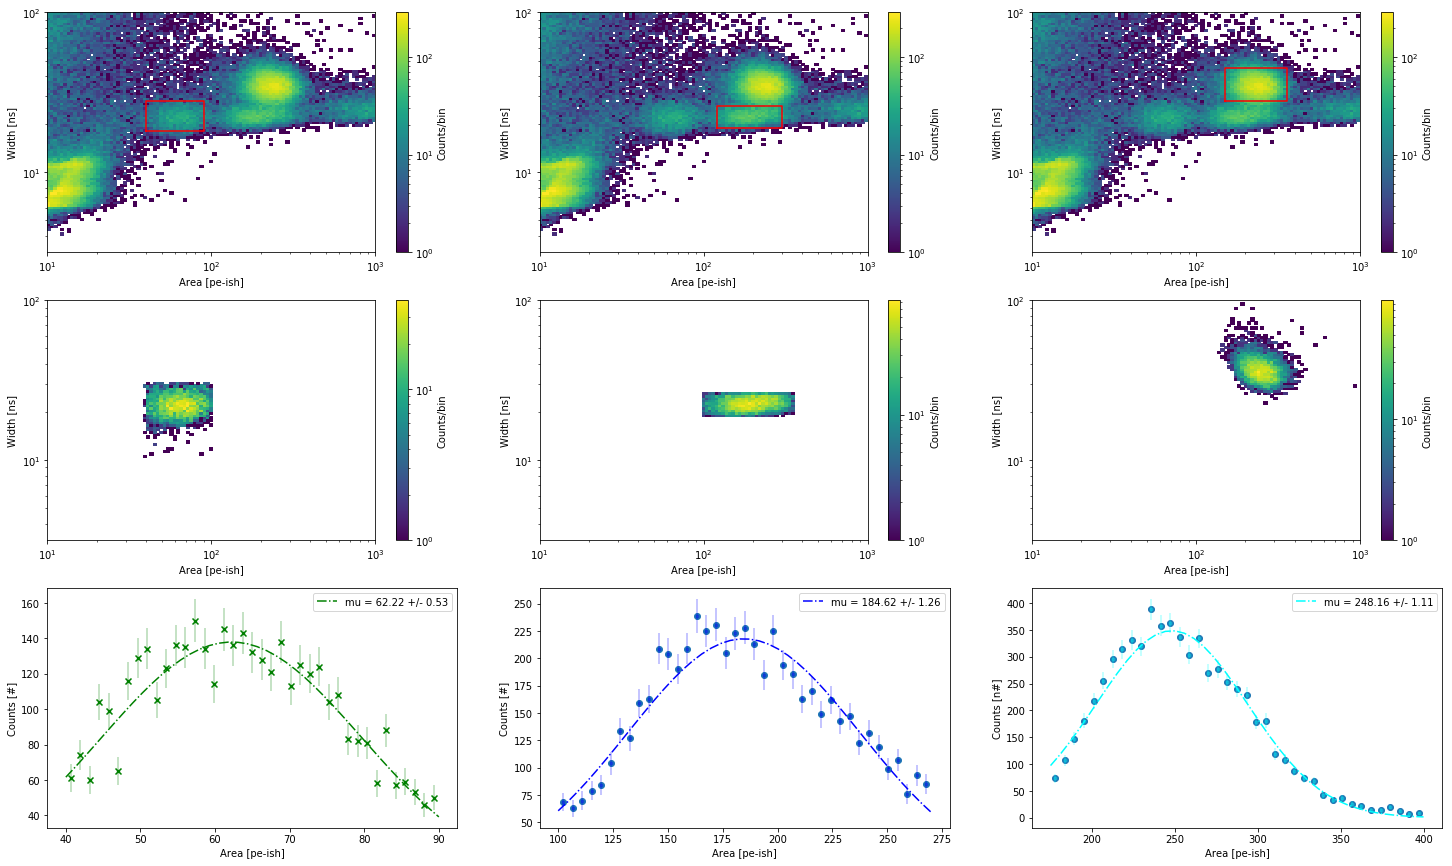

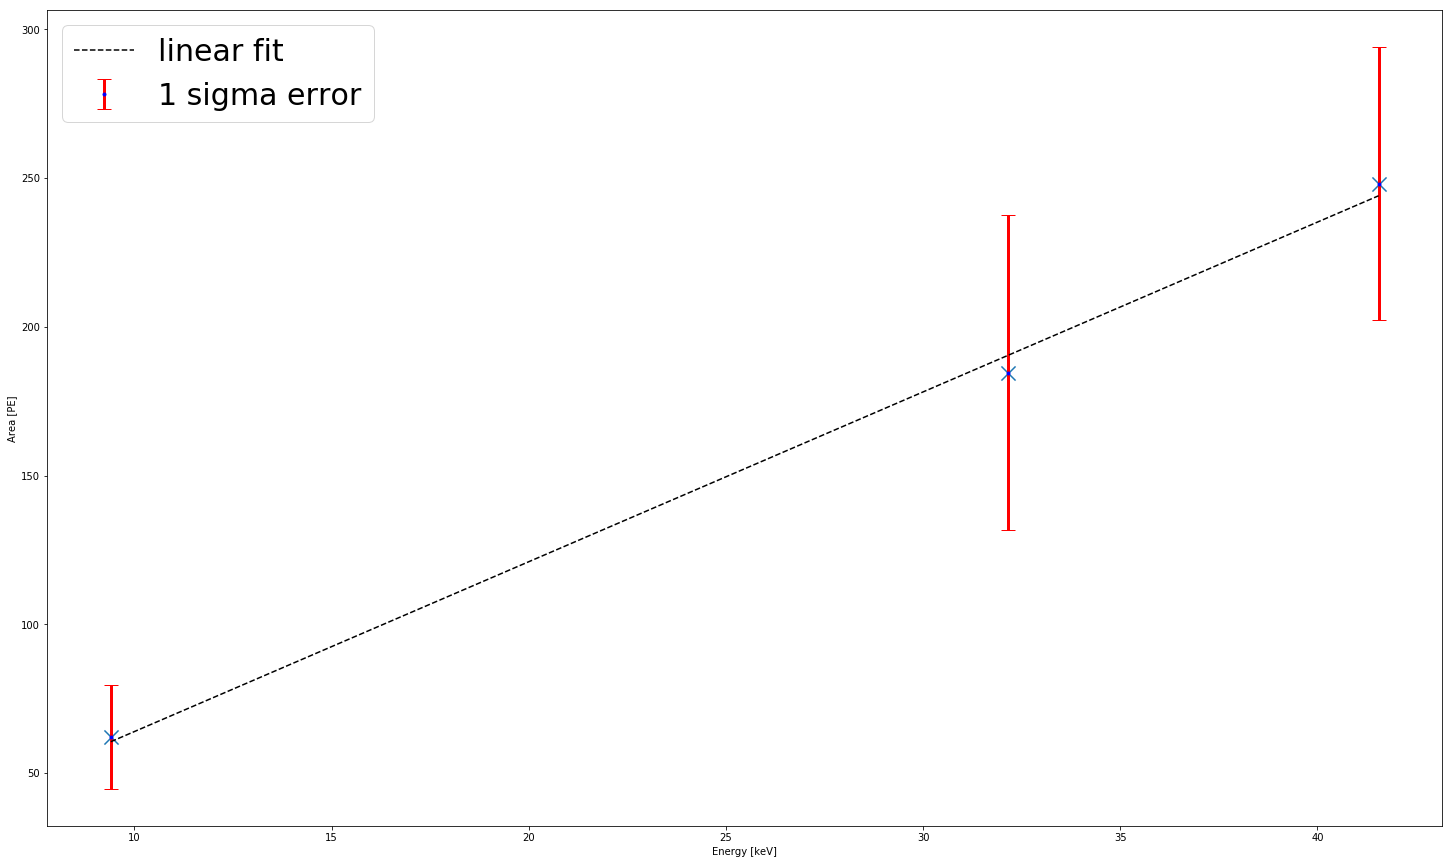

In [12]:
fig, ax = plt.subplots(3,3,figsize=(25,15))


bins_x = np.logspace(1, 3, 100)
bins_y = np.logspace(0.5, 2, 100)
x_range_9keV = np.linspace(40,90,40)
x_range_32keV = np.linspace(100,270,40)
x_range_41keV = np.linspace(175,400,40)

def linear_fit(x,a,c):
    linear = a*x+c
    return linear

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

def single_gaus_log(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus



# def poisson(k, lamb):
#     return (lamb**k/factorial(k)) * np.exp(-lamb)

def poisson_dist(k, lamb, scale):
    return scale*(lamb**k/factorial(k))*np.exp(-lamb)

# bin_mask = bincenters[50:90] 
# n_mask = n[50:90] 


# popt, pcov = curve_fit(single_gaus, bincenters, n, p0,  sigma=np.maximum(np.sqrt(n), np.ones_like(n)))
# plt.plot(bincenters,single_gaus(bincenters,*popt))
# plt.errorbar(bincenters, n, yerr=np.sqrt(n), marker= '.', mec='green', mfc= 'green', label='data with errorbar')
# perr = np.sqrt(np.diag(pcov))
p0_9keV = [150, 60,50]
p0_32keV = [250, 170,50]
p0_41keV = [400, 240,50]

# p0_poisson_9keV = [1]
# p0_poisson_32keV = [180,1]
# p0_poisson_41keV = [100,10]

counts1, _, _ = np.histogram2d(integral, width_decile, bins=(bins_x, bins_y))
counts2, _, _ = np.histogram2d(integral, width_decile, bins=(bins_x, bins_y))
counts3, _, _ = np.histogram2d(integral, width_decile, bins=(bins_x, bins_y))
counts4, _, _ = np.histogram2d(Kr_9keV_int, Kr_9keV_width_decile, bins=(bins_x, bins_y))
counts5, _, _ = np.histogram2d(Kr_32keV_int, Kr_32keV_width_decile, bins=(bins_x, bins_y))
counts6, _, _ = np.histogram2d(Kr_41keV_int, Kr_41keV_width_decile, bins=(bins_x, bins_y))
counts7, binEdges7 = np.histogram(Kr_9keV_int, bins=x_range_9keV)
counts8, binEdges8 = np.histogram(Kr_32keV_int, bins=x_range_32keV)
counts9, binEdges9 = np.histogram(Kr_41keV_int, bins=x_range_41keV)

bincenters_9keV = 0.5 * (binEdges7[1:] + binEdges7[:-1])
bincenters_32keV = 0.5 * (binEdges8[1:] + binEdges8[:-1])
bincenters_41keV = 0.5 * (binEdges9[1:] + binEdges9[:-1])









# params_9keV, cov_9keV = curve_fit(poisson, bincenters_9keV, counts7, p0 = p0_poisson_9keV)
# params_32keV, cov_32keV = curve_fit(poisson, bincenters_32keV, counts8, p0_poisson_32keV) 
# params_41keV, cov_41keV = curve_fit(poisson, bincenters_41keV, counts9, p0 = p0_poisson_41keV) 











popt7, pcov7= curve_fit(single_gaus, bincenters_9keV,  counts7, p0_9keV,   sigma=np.maximum(np.sqrt(counts7), np.ones_like(counts7)))
popt8, pcov8= curve_fit(single_gaus, bincenters_32keV, counts8, p0_32keV,  sigma=np.maximum(np.sqrt(counts8), np.ones_like(counts8)))
popt9, pcov9= curve_fit(single_gaus, bincenters_41keV, counts9, p0_41keV,  sigma=np.maximum(np.sqrt(counts9), np.ones_like(counts9)))
perr7 = np.sqrt(np.diag(pcov7))
perr8 = np.sqrt(np.diag(pcov8))
perr9 = np.sqrt(np.diag(pcov9))

mu_9keV = "%.2f" % popt7[1]
error_9keV = "%.2f" % perr7[1]
ly_short_9keV = popt7[1]/9.4
ly_9keV = "%.2f" % ly_short_9keV
sigma_9keV = "%.2f" % popt7[2]
error_sigma_9keV = "%.2f" % perr7[2]



mu_32keV = "%.2f" % popt8[1]
error_32keV = "%.2f" % perr8[1]
ly_short_32keV = popt8[1]/32.15
ly_32keV = "%.2f" % ly_short_32keV
sigma_32keV = "%.2f" % popt8[2]
error_sigma_32keV = "%.2f" % perr8[2]

mu_41keV = "%.2f" % popt9[1]
error_41keV = "%.2f" % perr9[1]
ly_short_41keV = popt9[1]/41.55
ly_41keV = "%.2f" % ly_short_41keV
sigma_41keV = "%.2f" % popt9[2]
error_sigma_41keV = "%.2f" % perr9[2]

perr8 = np.sqrt(np.diag(pcov8))
perr9 = np.sqrt(np.diag(pcov9))
error_on_ly_9keV = np.sqrt((1/9.4)**2 * perr7[1]**2)
error_on_ly_9keV = "%.2f" % error_on_ly_9keV

error_on_ly_32keV = np.sqrt((1/32.15)**2 * perr8[1]**2)
error_on_ly_32keV = "%.2f" % error_on_ly_32keV

error_on_ly_41keV = np.sqrt((1/41.55)**2 * perr9[1]**2)
error_on_ly_41keV = "%.2f" % error_on_ly_41keV


print('light yield 9keV: ', ly_9keV , '+/- ', error_on_ly_9keV, 'with a sigma of: ', sigma_9keV, '+/- ', error_sigma_9keV)
print('light yield 32keV: ', ly_32keV , '+/- ', error_on_ly_32keV, 'with a sigma of: ', sigma_32keV, '+/- ', error_sigma_32keV)
print('light yield 41keV: ', ly_41keV , '+/- ', error_on_ly_41keV, 'with a sigma of: ', sigma_41keV, '+/- ', error_sigma_41keV)


# ax[2,0].scatter(bincenters_9keV, counts7 ,c = 'g', marker = 'x')
# ax[2,0].plot(x_range_9keV, poisson(x_range_9keV, *params_9keV), 'r-', lw=2)
# ax[2,0].legend()

# ax[2,1].scatter(bincenters_32keV, counts8 ,c = 'g', marker = 'x')
# ax[2,1].plot(x_range_32keV, poisson(x_range_32keV, *params_32keV), 'r-', lw=2)
# ax[2,1].legend()

# ax[2,2].scatter(bincenters_41keV, counts9 ,c = 'g', marker = 'x')
# ax[2,2].plot(x_range_41keV, poisson(x_range_41keV, *params_41keV), 'r-', lw=2)
# ax[2,2].legend()
ax[2,0].scatter(bincenters_9keV, counts7 ,c = 'g', marker = 'x')
ax[2,0].plot(x_range_9keV, single_gaus(x_range_9keV, *popt7), color = 'green', linestyle = '-.', label ='mu = '+mu_9keV+' +/- '+error_9keV)
ax[2,0].errorbar(bincenters_9keV, counts7, yerr=np.sqrt(counts7), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')
ax[2,0].legend()
ax[2,1].scatter(bincenters_32keV, counts8)
ax[2,1].plot(x_range_32keV, single_gaus(x_range_32keV, *popt8), color = 'blue', linestyle = '-.', label ='mu = '+mu_32keV+' +/- '+error_32keV)
ax[2,1].errorbar(bincenters_32keV, counts8, yerr=np.sqrt(counts8), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')
ax[2,1].legend()
ax[2,2].scatter(bincenters_41keV, counts9)
ax[2,2].plot(x_range_41keV, single_gaus(x_range_41keV, *popt9), color = 'cyan', linestyle = '-.', label ='mu = '+mu_41keV+' +/- '+error_41keV)
ax[2,2].errorbar(bincenters_41keV, counts9, yerr=np.sqrt(counts9), ecolor='cyan', marker= '.', mec='cyan', mfc= 'cyan', alpha = 0.3, linestyle='None')
ax[2,2].legend()

im1 = ax[0,0].pcolormesh(bins_x, bins_y, counts1.T, norm=LogNorm())
im2 = ax[0,1].pcolormesh(bins_x, bins_y, counts2.T, norm=LogNorm())
im3 = ax[0,2].pcolormesh(bins_x, bins_y, counts3.T, norm=LogNorm())
im4 = ax[1,0].pcolormesh(bins_x, bins_y, counts4.T, norm=LogNorm())
im5 = ax[1,1].pcolormesh(bins_x, bins_y, counts5.T, norm=LogNorm())
im6 = ax[1,2].pcolormesh(bins_x, bins_y, counts6.T, norm=LogNorm())

p41 = np.array([(150,28),(360,45)], dtype=[('area', np.float32), ('rt', np.float32)])
p32 = np.array([(120,19),(300,26)], dtype=[('area', np.float32), ('rt', np.float32)])
p09 = np.array([(40,18),(90,28)], dtype=[('area', np.float32), ('rt', np.float32)])

ax[0,2].plot(p41['area'][[0,1,1,0,0]],p41['rt'][[0,0,1,1,0]], c='r')
ax[0,1].plot(p32['area'][[0,1,1,0,0]],p32['rt'][[0,0,1,1,0]], c='r')
ax[0,0].plot(p09['area'][[0,1,1,0,0]],p09['rt'][[0,0,1,1,0]], c='r')

plt.colorbar(im1, ax=ax[0,0], label='Counts/bin')
plt.colorbar(im2, ax=ax[0,1], label='Counts/bin')
plt.colorbar(im3, ax=ax[0,2], label='Counts/bin')
plt.colorbar(im4, ax=ax[1,0], label='Counts/bin')
plt.colorbar(im5, ax=ax[1,1], label='Counts/bin')
plt.colorbar(im6, ax=ax[1,2], label='Counts/bin')
#plt.colorbar(im6, ax=ax[1,2], label='Counts/bin')

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Area [pe-ish]')
ax[0,0].set_ylabel('Width [ns]')

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Area [pe-ish]')
ax[0,1].set_ylabel('Width [ns]')

ax[0,2].set_xscale('log')
ax[0,2].set_yscale('log')
ax[0,2].set_xlabel('Area [pe-ish]')
ax[0,2].set_ylabel('Width [ns]')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Area [pe-ish]')
ax[1,0].set_ylabel('Width [ns]')

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Area [pe-ish]')
ax[1,1].set_ylabel('Width [ns]')

ax[1,2].set_xscale('log')
ax[1,2].set_yscale('log')
ax[1,2].set_xlabel('Area [pe-ish]')
ax[1,2].set_ylabel('Width [ns]')

# ax[2,0].set_xscale('log')
# ax[2,0].set_yscale('log')
ax[2,0].set_xlabel('Area [pe-ish]')
ax[2,0].set_ylabel('Counts [#]')


ax[2,1].set_xlabel('Area [pe-ish]')
ax[2,1].set_ylabel('Counts [#]')


ax[2,2].set_xlabel('Area [pe-ish]')
ax[2,2].set_ylabel('Counts [n#]')
plt.show()



fig, ax = plt.subplots(1,1, figsize=(25,15))

SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)


kr_err_list = [perr7[1], perr8[1], perr9[1]]
kr_energy = [9.4, 32.15, 41.55]
kr_sigma_list = [popt7[2], popt8[2], popt9[2]]
kr_list = [popt7[1], popt8[1], popt9[1]]

plt.scatter(kr_energy, kr_list, marker = 'x', s=200)
plt.errorbar(kr_energy, kr_list, yerr=kr_sigma_list,marker= '.', ecolor='red', capsize=7, fmt = 'bx',elinewidth=3, label='1 sigma error')


fit = np.polyfit(kr_energy,kr_list,1)
fit_fn = np.poly1d(fit)
#plt.plot(kr_energy,kr_list, 'yo', label = 'linear fit')
plt.plot(kr_energy, fit_fn(kr_energy), '--k', label = 'linear fit')
#plt.fill_between(kr_energy, kr_list-kr_sigma_list, kr_list+kr_sigma_list)
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Area [PE]')
plt.legend(loc =2,prop={'size': 30})
plt.show()

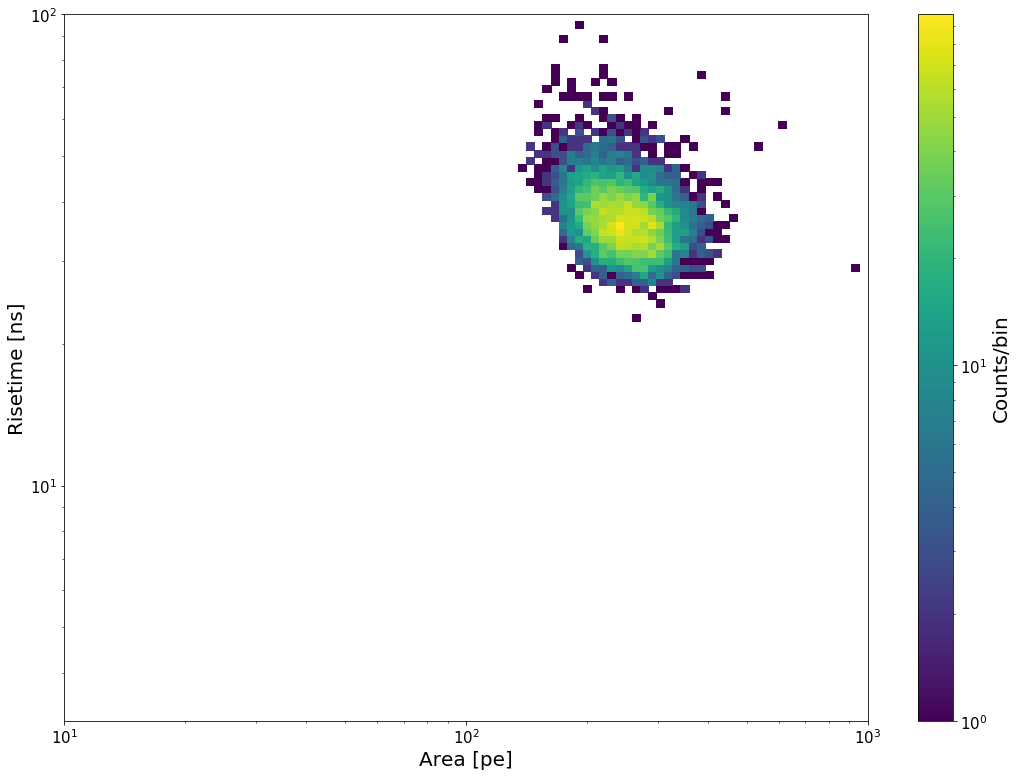

In [30]:
fig, ax = plt.subplots(figsize=(18,13))

bins_x = np.logspace(1, 3, 100)
bins_y = np.logspace(0.5, 2, 100)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

x_range_41keV = np.linspace(175,400,40)
p0_41keV = [400, 240,50]
counts, _, _ = np.histogram2d(integral, width_decile, bins=(bins_x, bins_y))
counts_selected, _, _ = np.histogram2d(Kr_41keV_int, Kr_41keV_width_decile, bins=(bins_x, bins_y))
countsfit, binEdgesfit = np.histogram(Kr_41keV_int, bins=x_range_41keV)

im = ax.pcolormesh(bins_x, bins_y, counts_selected.T, norm=LogNorm())
bincenters_41keV = 0.5 * (binEdgesfit[1:] + binEdgesfit[:-1])
poptfit, pcovfit= curve_fit(single_gaus, bincenters_41keV, countsfit, p0_41keV,  sigma=np.maximum(np.sqrt(countsfit), np.ones_like(countsfit)))
perrfit = np.sqrt(np.diag(pcovfit))

mu_41keV = "%.2f" % poptfit[1]
error_41keV = "%.2f" % perrfit[1]
ly_short_41keV = poptfit[1]/41.55
ly_41keV = "%.2f" % ly_short_41keV
sigma_41keV = "%.2f" % poptfit[2]
error_sigma_41keV = "%.2f" % perrfit[2]

plt.colorbar(im, ax=ax, label='Counts/bin')
#p41 = np.array([(150,28),(360,45)], dtype=[('area', np.float32), ('rt', np.float32)])
#ax.plot(p41['area'][[0,1,1,0,0]],p41['rt'][[0,0,1,1,0]], c='r')
#ax.scatter(bincenters_41keV, countsfit)
#ax.errorbar(bincenters_41keV, countsfit, yerr=np.sqrt(countsfit), ecolor='cyan', marker= '.', mec='cyan', mfc= 'cyan', alpha = 0.3, linestyle='None')
#ax.plot(x_range_41keV, single_gaus(x_range_41keV, *poptfit), color = 'cyan', linestyle = '-.', label ='mu = '+mu_41keV+' +/- '+error_41keV)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Area [pe]')
ax.set_ylabel('Risetime [ns]')
#plt.legend(loc =1,prop={'size': 20})
plt.show()

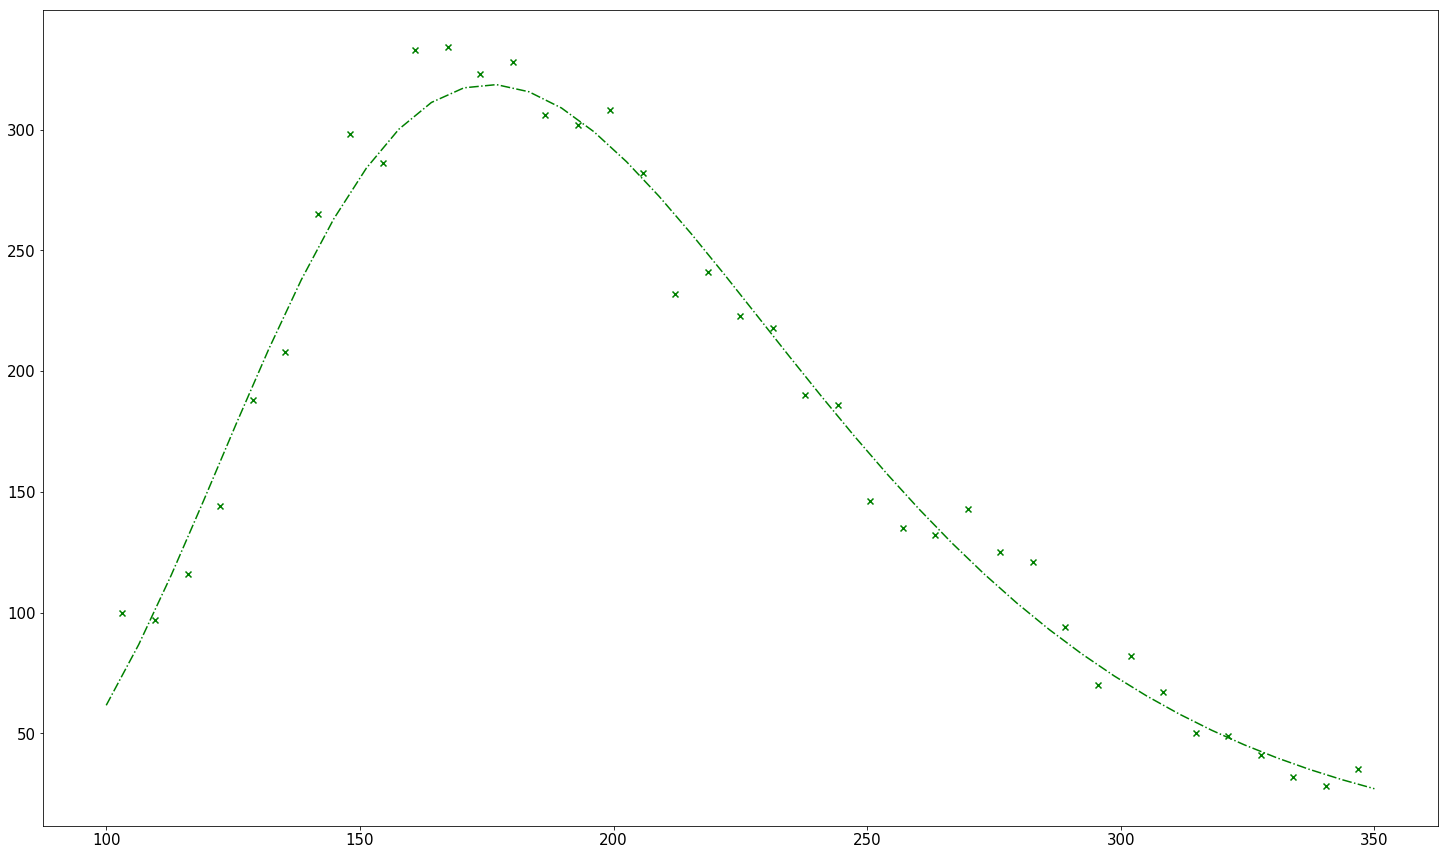

[3.18711978e+02 5.16818162e+00 3.10501282e-01]
184.26724888768635
58.62236564193886


In [13]:
fig, ax = plt.subplots(1,1,figsize=(25,15))

# def poisson_dist(k, lamb, scale):
#     return scale*(lamb**k/factorial(k))*np.exp(-lamb)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

# def log_gaus(x, h, mu, sigma):

#     gaus = 1/(np.sqrt(2*math.pi)*sigma*x) * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
#     return gaus

def log_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

p0_32keV = [250, 10,1]
#starting_values = [1, 1]
x_range_32keV = np.linspace(100,350,40)
counts8, binEdges8 = np.histogram(Kr_32keV_int, bins=x_range_32keV)
bincenters_32keV = 0.5 * (binEdges8[1:] + binEdges8[:-1])


#params_32keV, cov_32keV = curve_fit(poisson, bincenters_32keV, counts8, p0 = starting_values) 
#popt8, pcov8 = curve_fit(single_gaus, bincenters_32keV, counts8, p0_32keV,  sigma=np.maximum(np.sqrt(counts8), np.ones_like(counts8)))
popt8, pcov8 = curve_fit(log_gaus, bincenters_32keV, counts8, p0_32keV,  sigma=np.maximum(np.sqrt(counts8), np.ones_like(counts8)))
ax.scatter(bincenters_32keV, counts8 ,c = 'g', marker = 'x')
#ax.set_xscale('log')


#ax.plot(x_range_32keV, poisson(x_range_32keV, *params_32keV), 'r-', lw=2)
ax.plot(x_range_32keV, log_gaus(x_range_32keV, *popt8), color = 'green', linestyle = '-.')
#ax.plot(x_range_32keV, poisson_dist(x_range_32keV, 200, 100), 'r-', lw=2)

plt.show()
print(popt8)
print(np.exp(popt8[1]+((popt8[2]**2)/2)))
print(np.exp(popt8[1]+((popt8[2]**2)/2))    * np.sqrt(np.exp(popt8[2]**2)-1))

# Now check the corresponding S2s

9keV S2:  8462.59 +/-  2999.34
9keV S2:  mu +/- sigma


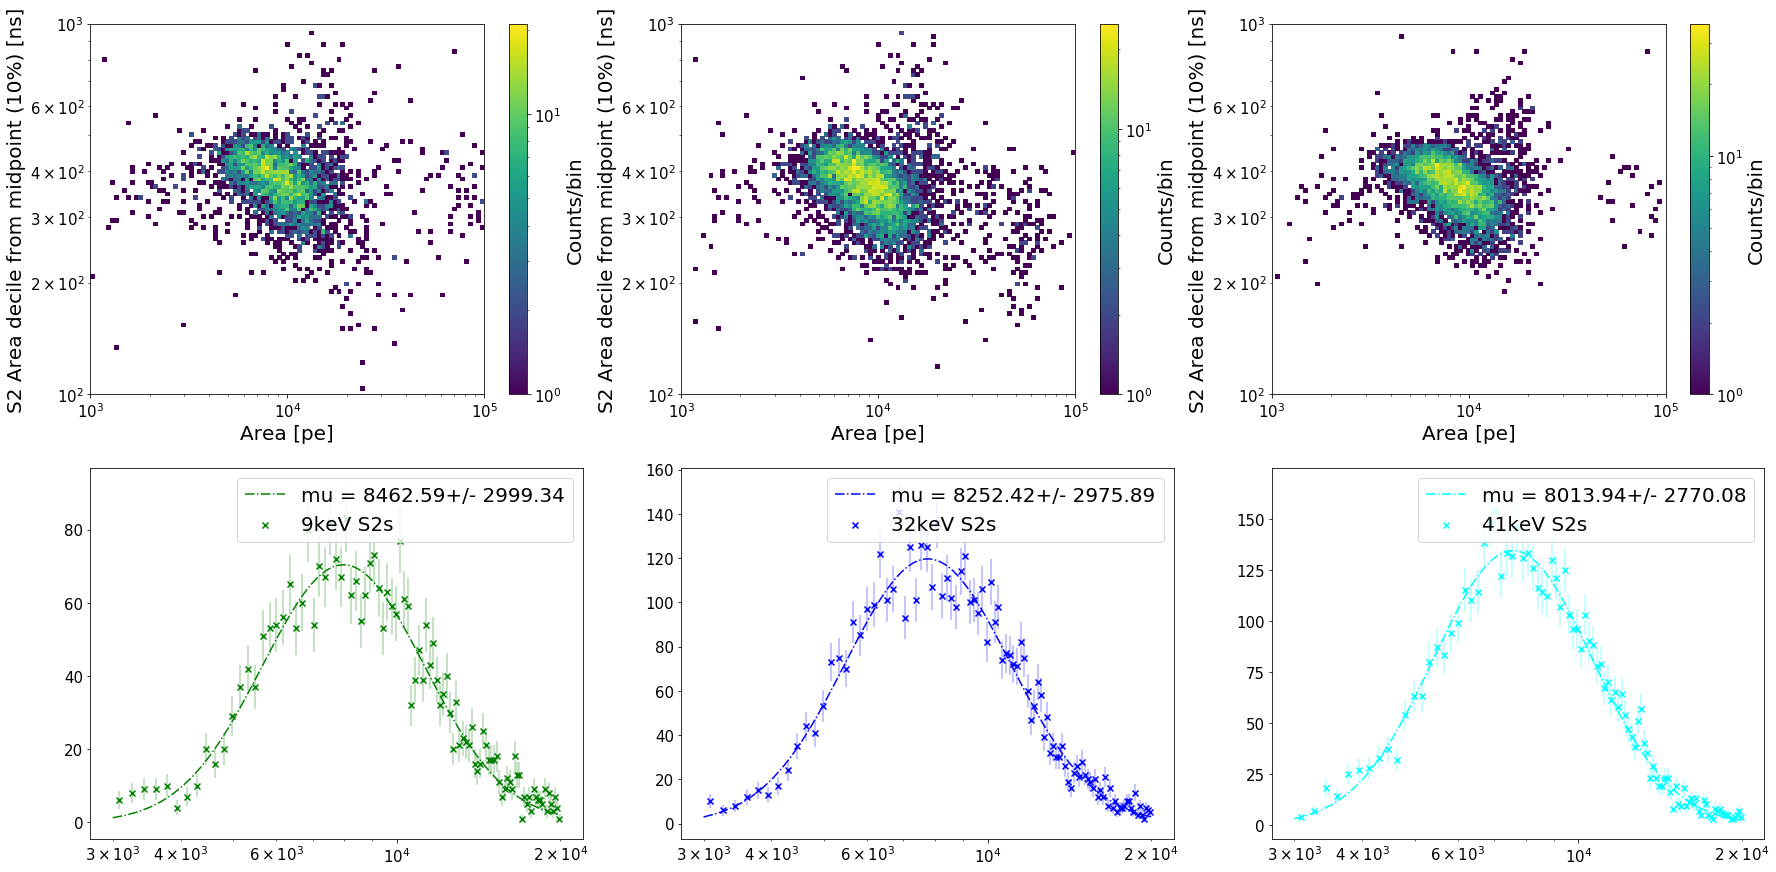

In [14]:
def log_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus



p0_S2_9keV = [100, 8,5]
p0_S2_32keV = [100, 8,5]
p0_S2_41keV = [100, 8,5]
fig, ax = plt.subplots(2,3,figsize=(30,15))
bins_x = np.logspace(3, 5, 100)
bins_y = np.logspace(2, 3, 100)
histo_max= 2*10**3
S2_range = np.linspace(3000,20000,100)




S2_9keV, _, _ = np.histogram2d(Kr_S2_area_9keV, Kr_S2_risetime_9keV, bins=(bins_x, bins_y))
S2_32keV, _, _ = np.histogram2d(Kr_S2_area_32keV, Kr_S2_risetime_32keV, bins=(bins_x, bins_y))
S2_41keV, _, _ = np.histogram2d(Kr_S2_area_41keV, Kr_S2_risetime_41keV, bins=(bins_x, bins_y))

# S2_9keV, _, _ = np.histogram2d(Kr_S2_area_9keV, Kr_S2_width_9keV, bins=(bins_x, bins_y))
# S2_32keV, _, _ = np.histogram2d(Kr_S2_area_32keV, Kr_S2_width_32keV, bins=(bins_x, bins_y))
# S2_41keV, _, _ = np.histogram2d(Kr_S2_area_41keV, Kr_S2_width_41keV, bins=(bins_x, bins_y))

S2_9keV_scatter, binEdges_9keV =   np.histogram(Kr_S2_area_9keV,  bins=S2_range)
S2_32keV_scatter, binEdges_32keV = np.histogram(Kr_S2_area_32keV, bins=S2_range)
S2_41keV_scatter, binEdges_41keV = np.histogram(Kr_S2_area_41keV, bins=S2_range)

bincenters_9keV = 0.5 *  (binEdges_9keV[1:] + binEdges_9keV[:-1])
bincenters_32keV = 0.5 * (binEdges_32keV[1:] + binEdges_32keV[:-1])
bincenters_41keV = 0.5 * (binEdges_41keV[1:] + binEdges_41keV[:-1])

popt_S2_9keV,  pcov_S2_9keV = curve_fit(log_gaus, bincenters_9keV, S2_9keV_scatter, p0 = p0_S2_9keV, sigma=np.maximum(np.sqrt(S2_9keV_scatter), np.ones_like(S2_9keV_scatter)), maxfev = 10000)
popt_S2_32keV, pcov_S2_32keV= curve_fit(log_gaus, bincenters_32keV, S2_32keV_scatter, p0 = p0_S2_32keV,  sigma=np.maximum(np.sqrt(S2_32keV_scatter), np.ones_like(S2_32keV_scatter)))
popt_S2_41keV, pcov_S2_41keV= curve_fit(log_gaus, bincenters_41keV, S2_41keV_scatter, p0 = p0_S2_41keV,  sigma=np.maximum(np.sqrt(S2_41keV_scatter), np.ones_like(S2_41keV_scatter)))
perr_S2_9keV= np.sqrt(np.diag(pcov_S2_9keV))
perr_S2_32keV = np.sqrt(np.diag(pcov_S2_32keV))
perr_S2_41keV = np.sqrt(np.diag(pcov_S2_41keV))



# print(np.exp(popt8[1]+((popt8[2]**2)/2)))
# print(np.exp(popt8[1]+((popt8[2]**2)/2))    * np.sqrt(np.exp(popt8[2]**2)-1))

S2_mu_9keV = np.exp(popt_S2_9keV[1]+((popt_S2_9keV[2]**2)/2))
S2_mu_9keV = "%.2f" % S2_mu_9keV
S2_sigma_9keV = np.exp(popt_S2_9keV[1]+((popt_S2_9keV[2]**2)/2))    * np.sqrt(np.exp(popt_S2_9keV[2]**2)-1)
S2_sigma_9keV = "%.2f" % S2_sigma_9keV

S2_mu_32keV = np.exp(popt_S2_32keV[1]+((popt_S2_32keV[2]**2)/2))
S2_mu_32keV = "%.2f" % S2_mu_32keV
S2_sigma_32keV = np.exp(popt_S2_32keV[1]+((popt_S2_32keV[2]**2)/2))    * np.sqrt(np.exp(popt_S2_32keV[2]**2)-1)
S2_sigma_32keV = "%.2f" % S2_sigma_32keV

S2_mu_41keV = np.exp(popt_S2_41keV[1]+((popt_S2_41keV[2]**2)/2))
S2_mu_41keV = "%.2f" % S2_mu_41keV
S2_sigma_41keV = np.exp(popt_S2_41keV[1]+((popt_S2_41keV[2]**2)/2))    * np.sqrt(np.exp(popt_S2_41keV[2]**2)-1)
S2_sigma_41keV = "%.2f" % S2_sigma_41keV

# S2_mu_9keV = "%.2f" % np.exp(popt_S2_9keV[1])
# S2_perr_9keV = np.sqrt(np.diag(pcov_S2_9keV))
# S2_error_ln_mu_9keV = S2_perr_9keV[1]
# S2_error_mu_9keV = np.exp(S2_perr_9keV[1])*S2_error_ln_mu_9keV
# S2_error_mu_9keV = "%.2f" % S2_error_mu_9keV
# S2_sigma_9keV = "%.2f" % popt_S2_9keV[2]



im1 = ax[0,0].pcolormesh(bins_x, bins_y, S2_9keV.T, norm=LogNorm())
cb1 = plt.colorbar(im1, ax=ax[0,0], label='Counts/bin')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Area [pe]')
ax[0,0].set_ylabel('S2 Area decile from midpoint (10%) [ns]')

im2 = ax[0,1].pcolormesh(bins_x, bins_y, S2_32keV.T, norm=LogNorm())
cb2 = plt.colorbar(im2, ax=ax[0,1], label='Counts/bin')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Area [pe]')
ax[0,1].set_ylabel('S2 Area decile from midpoint (10%) [ns]')

im3 = ax[0,2].pcolormesh(bins_x, bins_y, S2_41keV.T, norm=LogNorm())
cb3 = plt.colorbar(im3, ax=ax[0,2], label='Counts/bin')
ax[0,2].set_xscale('log')
ax[0,2].set_yscale('log')
ax[0,2].set_xlabel('Area [pe]')
ax[0,2].set_ylabel('S2 Area decile from midpoint (10%) [ns]')


ax[1,0].scatter(bincenters_9keV, S2_9keV_scatter ,c = 'g', marker = 'x', label = '9keV S2s')
ax[1,0].plot(S2_range, log_gaus(S2_range, *popt_S2_9keV), color = 'green', linestyle = '-.', label ='mu = '+str(S2_mu_9keV)+ '+/- '+ str(S2_sigma_9keV))
ax[1,0].errorbar(bincenters_9keV, S2_9keV_scatter, yerr=np.sqrt(S2_9keV_scatter), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')
ax[1,0].set_xscale('log')
ax[1,0].legend()

ax[1,1].scatter(bincenters_32keV, S2_32keV_scatter, c = 'b', marker = 'x' , label = '32keV S2s')
ax[1,1].plot(S2_range, log_gaus(S2_range, *popt_S2_32keV), color = 'blue', linestyle = '-.' , label ='mu = '+str(S2_mu_32keV)+ '+/- '+ str(S2_sigma_32keV))
ax[1,1].errorbar(bincenters_32keV, S2_32keV_scatter, yerr=np.sqrt(S2_32keV_scatter), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')
ax[1,1].set_xscale('log')
ax[1,1].legend()

ax[1,2].scatter(bincenters_41keV, S2_41keV_scatter, c = 'cyan', marker = 'x' , label = '41keV S2s')
ax[1,2].plot(S2_range, log_gaus(S2_range, *popt_S2_41keV), color = 'cyan', linestyle = '-.', label ='mu = '+str(S2_mu_41keV)+ '+/- '+ str(S2_sigma_41keV))
ax[1,2].errorbar(bincenters_41keV, S2_41keV_scatter, yerr=np.sqrt(S2_41keV_scatter), ecolor='cyan', marker= '.', mec='cyan', mfc= 'cyan', alpha = 0.3, linestyle='None')
ax[1,2].set_xscale('log')
ax[1,2].legend()

print('9keV S2: ', S2_mu_9keV, '+/- ',S2_sigma_9keV )
print('9keV S2: ', 'mu +/- sigma')

plt.show()

In [15]:
# fig, ax = plt.subplots(1,1,figsize=(25,15))
# bins_x = np.logspace(1, 6, 100)
# bins_y = np.logspace(0, 5, 100)
# histo_max= 2*10**3
# S2_9keV, _, _ = np.histogram2d(Kr_S2_area_32keV, Kr_S2_risetime_32keV, bins=(bins_x, bins_y))



# im = ax.pcolormesh(bins_x, bins_y, S2_9keV.T, norm=LogNorm())
# cb = plt.colorbar(im, ax=ax, label='Counts/bin')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel('Area [pe]')
# ax.set_ylabel('Risetime [ns]')


# plt.show()